<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/geopandas_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
mex =geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/datos/geopandas/mexican-states.shp')
mex.columns
mex=mex[['name','geometry']]

Grafica de todos los poligonos en el archivo

<Axes: >

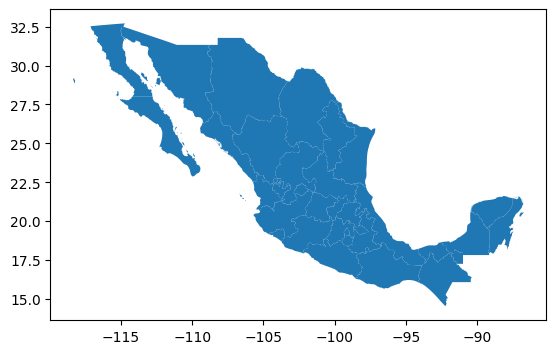

In [13]:
mex.plot()

Grafica del contorno

<Axes: >

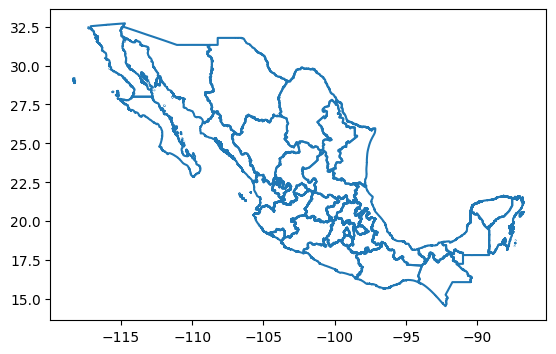

In [ ]:
mex.boundary.plot()

Leemos archivo de población de INEGI

In [ ]:
poblacion= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/geopandas/Tabulado.csv')
poblacion=poblacion.drop(poblacion.index[0])
poblacion['Total']=poblacion['Total']+ poblacion['Total.1']+poblacion['Total.2']
poblacion=poblacion[['Entidad federativa', 'Total']]
poblacion.head()

,Entidad federativa,Total
1,Aguascalientes,3194697.0
2,Baja California,8486906.0
3,Baja California Sur,1573237.0
4,Campeche,2267860.0
5,Coahuila de Zaragoza,7541661.0


juntar archivos  donde los nombres coincidan, por practicidad solo usaremos la columna total de los tres periodos de años

In [ ]:
mexgdf= mex.merge(poblacion,left_on=['name'],right_on=['Entidad federativa'])
#mexgdf=mexgdf[['name','Entidad federativa', 'Total']] #aqui le estaba quitando el geometry, por eso se volvia dataframe de pandas
type(mexgdf)

geopandas.geodataframe.GeoDataFrame

Graficamos respecto al Total

<Axes: >

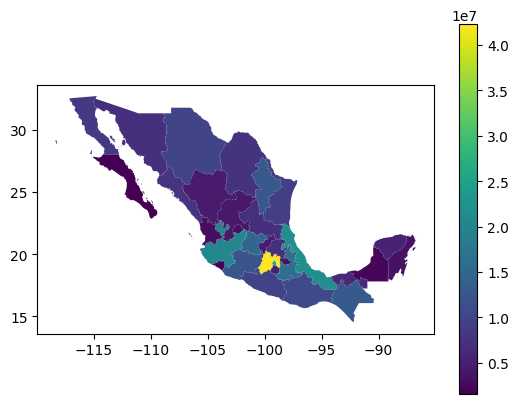

In [ ]:
mexgdf.plot(column='Total', ax = plt.gca(), legend=True)

Configurando el ancho de colores y/o tamaño de posición de leyenda:

<Axes: >

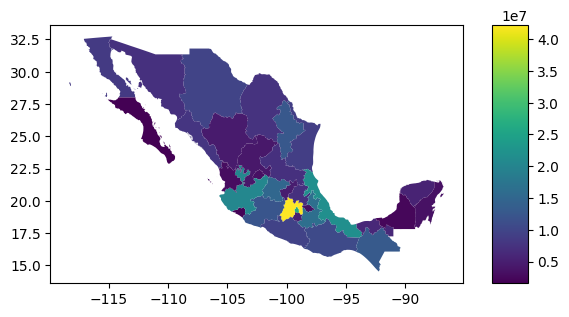

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="8%", pad=0.1)
mexgdf.plot( column= 'Total', ax = ax, legend=True, cax=cax)

<Axes: >

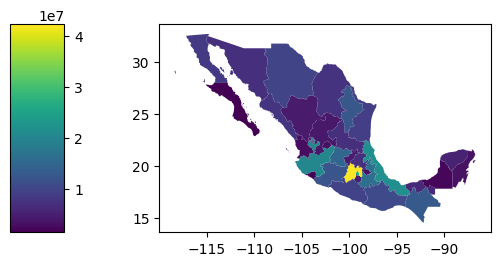

In [ ]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="15%", pad=0.8)
mexgdf.plot( column= 'Total', ax = ax, legend=True, cax=cax)

colocando etiqueta

<Axes: >

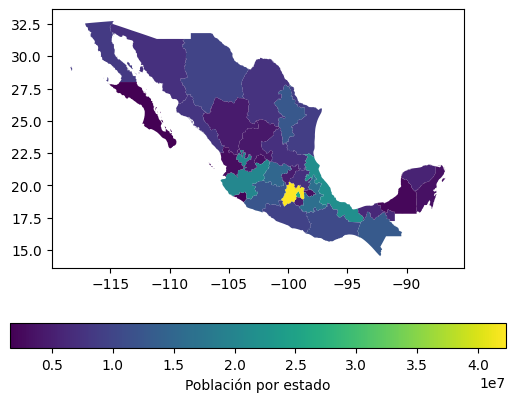

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mexgdf.plot(column='Total',
         ax=ax,
         legend=True,
         legend_kwds={'label': "Población por estado",
                                    'orientation': "horizontal"
                                 })

Diferentes mapas

<Axes: >

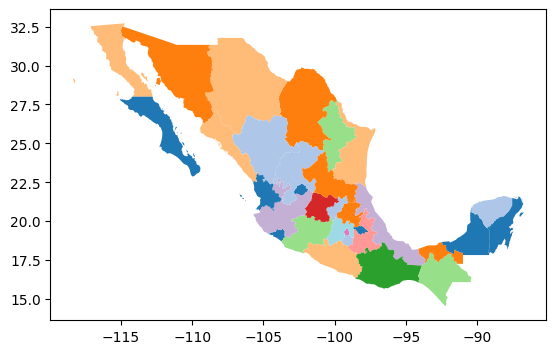

In [ ]:
mexgdf.plot(column='Total',cmap='tab20')

<Axes: >

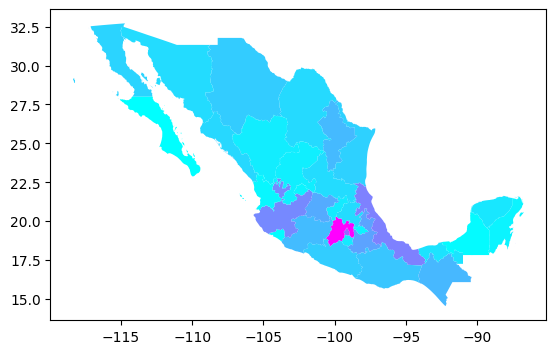

In [ ]:
mexgdf.plot(column='Total',cmap='cool')

<Axes: >

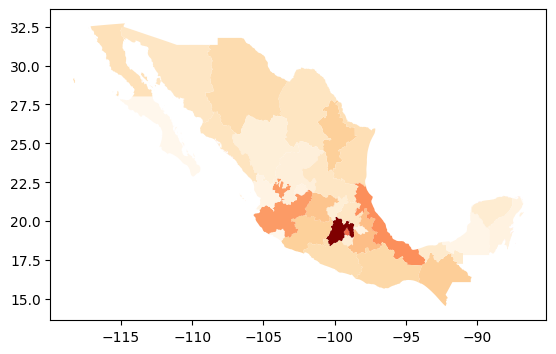

In [ ]:
mexgdf.plot(column='Total',cmap='OrRd')

# Agragando capas

Vamos a cargar y agregar datos a nuestro mapa, en este caso el de capitales:


In [11]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/geopandas/mexican-capitals.csv')
capitales=geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Long,df.Lat))
capitales[:5]

,Estado,Capital,Lat,Long,geometry
0,Aguascalientes,Aguascalientes,21.880833,-102.296111,POINT (-102.29611 21.88083)
1,Baja California,Mexicali,32.663333,-115.467778,POINT (-115.46778 32.66333)
2,Baja California Sur,La Paz,24.142222,-110.310833,POINT (-110.31083 24.14222)
3,Campeche,San Francisco de Campeche,19.848611,-90.525278,POINT (-90.52528 19.84861)
4,Chiapas,Tuxtla Gutiérrez,16.753056,-93.115556,POINT (-93.11556 16.75306)


Aseguramos que usemos el mismo **Sistema de Referencia de Coordenadas**

<Axes: >

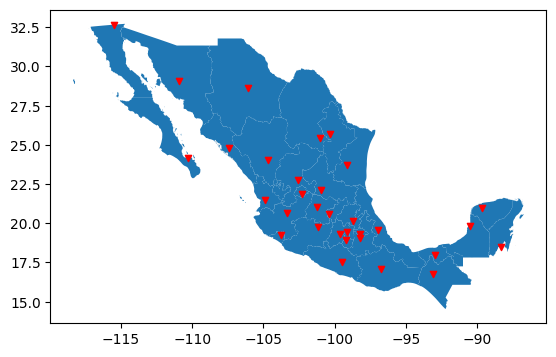

In [15]:
capitales=capitales.set_crs(mex.crs)
#mapa base
mapa=mex.plot()
# puntos correspondientes a las capitales del país
capitales.plot(ax=mapa,marker='v',color='red',markersize=20)

# capas usando Matplotlib

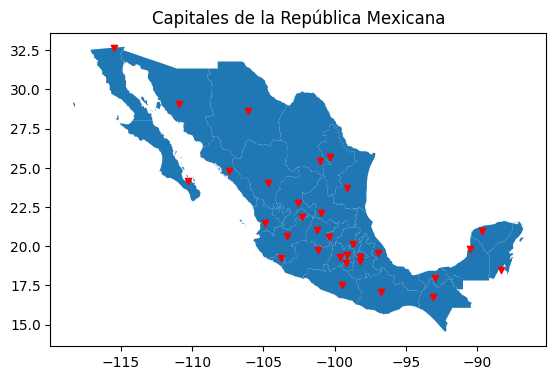

In [16]:
# Como vamos a usar objetos de matplotlib es necesario importarlo
import matplotlib.pyplot as plt
# Creamos una sola figura y un subplot
fig, ax = plt.subplots()
# Le damos un título al mapa
ax.set_title('Capitales de la República Mexicana')
# El parámetro equal ajusta el tamaño de los ejes para que tengan
# una correspondencia de 1 a 1
ax.set_aspect('equal')
# Graficamos el mapa usando los ejes que definimos arriba
mex.plot(ax=ax)
# Graficamos las capitales usando los mismos ejes
capitales.plot(ax=ax, marker='v', color='red', markersize=20)
# Mostramos el mapa
plt.show();

# usando el atributo **zorder**

<Axes: >

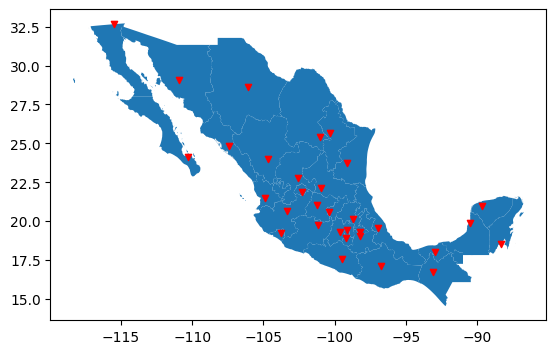

In [17]:
# Pintamos ahora las capitales en zorder 2
mapa = capitales.plot(marker='v', color='red', markersize=20,zorder=2)
# Y después el mapa completo en zorder 1
mex.plot(ax=mapa, zorder=1)

Si agregamos otra capa para hacer que se vea la República Mexicana como fondo, luego las fronteras de los estados, finalmente, la posición de las capitales:

<Axes: >

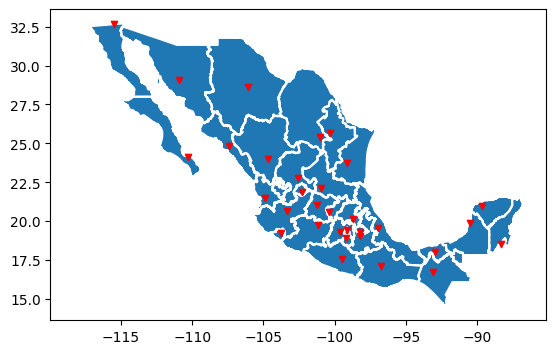

In [18]:
# Pintamos ahora las capitales en zorder 3 para que esté hasta arriba
mapa = capitales.plot(marker='v', color='red', markersize=20,zorder=3)
# Y después el mapa completo en zorder 1 para que sea el fondo
mex.plot(ax=mapa, zorder=1)
# Finalmente, graficamos los bordes en zorder 2 para que queden en medio
mex.boundary.plot(ax=mapa, zorder=2, color='white')